# Linear Algebra and Programming Skills
## Mock Exam Questions
These mock exam questions have been designed to be similar to the question that you will receive in the exam. In the exam you will have a choice to use MATLAB or Python to answer the questions but it is advisable to become proficient in both languages for future units and to enhance your employability.

---
### Question 1

(a) Given the matrices 
$$A = \begin{pmatrix} 1 & 1 & 2 \cr 3 & 3 & 1 \cr 1 & 7 & 4 \end{pmatrix}, \qquad
B = \begin{pmatrix} 5 & 6 & 7 \end{pmatrix}$$ 
write a program that does the following:

&emsp; &emsp; (i) defines arrays corresponding to $A$ and $B$ and print the arrays;


In [1]:
import numpy as np

A = np.array([[ 1, 1, 2 ], [ 3, 3, 1 ], [ 1, 7, 4 ]])
B = np.array([ 5, 6, 7 ])
print(A)
print(B)

[[1 1 2]
 [3 3 1]
 [1 7 4]]
[5 6 7]


&emsp; &emsp; (ii) replaces the second row of $A$ with the elements from $B$ and prints the result;

In [2]:
A[1,:] = B
print(A)

[[1 1 2]
 [5 6 7]
 [1 7 4]]


&emsp; &emsp; (iii) print the elements from the final column of the matrix from part (ii).

In [3]:
print(A[:,-1])

[2 7 4]


(b) Define a function called `inv_2x2` that calculates the inverse of a $2\times 2$ matrix using the formula

$$A^{-1} = \frac{1}{a_{11}a_{22} - a_{12}a_{21}} \begin{pmatrix} a_{22} & -a_{12} \cr -a_{21} & a_{11} \end{pmatrix}.$$

Your program should use an `if` statement to check if $A$ is singular, i.e., $a_{11}a_{22} - a_{12}a_{21} = 0$, and print a warning message if so. Use your function to calculate the inverse of the matrix 

$$C = \begin{pmatrix} 1 & -1 \cr 3 & 2 \end{pmatrix}.$$

In [4]:
import numpy as np


def inv_2x2(A):
    """
    Calculates the inverse of a 2x2 matrix
    """
    
    # Check for singularity
    detA = A[0,0] * A[1,1] - A[0,1] * A[1,0]
    if detA == 0:
        print("Warning, matrix is singular")
        return
    
    # Calculate inverse
    invA = np.array([[ A[1,1], -A[0,1]], [ -A[1,0], A[0, 0]]]) / detA
    
    return invA


# Define C and calculate its inverse
C = np.array([[ 1, -1 ], [ 3, 2 ]])
print(inv_2x2(C))

[[ 0.4  0.2]
 [-0.6  0.2]]


---
### Question 2


(a) Define arrays corresponding to the the following matrices:
$$A = \begin{pmatrix} 3 & 0 \cr -1 & 5 \end{pmatrix}, 
\qquad
B = \begin{pmatrix} 2 & 0 & -1 \cr 4 & 2 & 3 \end{pmatrix}.$$

Hence calculate and output (you may use any functions available from MATLAB or Python libraries):

&emsp;&emsp;(i) $AB$ (the matrix mulitplication of $A$ and $B$);

In [5]:
import numpy as np

A = np.array([[ 3, 0 ], [ -1, 5 ]])
B = np.array([[ 2, 0, -1 ], [ 4, 2, 3 ]])

AB = np.matmul(A, B)
print(AB)

[[ 6  0 -3]
 [18 10 16]]


&emsp;&emsp;(ii) $(AB)^TA$;

In [6]:
print(np.matmul(AB.T, A))

[[  0  90]
 [-10  50]
 [-25  80]]


&emsp;&emsp;(iii) $\det(A)$;

In [7]:
print(np.linalg.det(A))

15.0


&emsp;&emsp;(iv) $A^{-1}$;

In [8]:
print(np.linalg.inv(A))

[[0.33333333 0.        ]
 [0.06666667 0.2       ]]


&emsp;&emsp;(v) the matrix formed using the first two columns of $B$ which is then multiplied by $A$.

In [9]:
print(np.matmul(B[:,:2], A))

[[ 6  0]
 [10 10]]


(b) Write a program that uses nested `for` loops to calculate the sum of the elements of the matrix $C = B^TB$.

In [10]:
C = np.matmul(B.T, B)
rows, cols = C.shape
mysum = 0

for i in range(rows):
    for j in range(cols):
        mysum = mysum + C[i,j]

print("The sum of the elements in C is {}.".format(mysum))

The sum of the elements in C is 82.


(c) The determinant of a $2 \times 2$ matrix $A$ is defined by the formula

$$ \det(A) = a_{11}a_{22} - a_{12}a_{21}.$$

Write a function called `mydet` that given an input of a $2\times 2$ array `A` returns its determinant. Your function should check whether the inputted matrix has 2 rows and 2 columns, if it does not not it should print a warning message and exit. Test your function on your arrays `A` and `B` from part (a).

In [11]:
def mydet(A):
    """
    Calculates the determinant of a 2x2 matrix
    """
    
    rows, cols = A.shape
    if rows != 2 or cols != 2:
        print("Error, input must be a 2 x 2 matrix")
        return

    return A[0,0] * A[1,1] - A[0,1] * A[1,1]


# Calculate the determinants of A and B
print(mydet(A))

print(mydet(B))

15
Error, input must be a 2 x 2 matrix
None


---
### Question 3
(a) Write a program to calculate the sum of the following series using a given number of terms

$$ e^{2x} = \sum_{n=0}^\infty \frac{(2x)^n}{n!} =  1 + 2x + \frac{(2x)^2}{2!} + \frac{(2x)^3}{4!} + \ldots$$

and output the result correct to 6 decimal places. Your program may use the `factorial` command from MATLAB or the `math` library in Python. Use your program to calculate $e^{2x}$ for $x=2.5$ using the first 12 terms.

In [12]:
import math

x, nterms = 2.5, 12
exp2x = 0

for n in range(nterms):
    exp2x = exp2x + (2 * x) ** n / math.factorial(n)

print("exp(2 * {}) = {:1.6f}".format(x, exp2x))

exp(2 * 2.5) = 147.603849


(b) Write a program that uses a `while` loop to calculate the sum of the series in part (a) ceasing iterations when the difference between successive terms of the series is less than $10^{-4}$ and outputs the value of $e^{2x}$ and the number of iterations used. Test your program using $x=2.5$.

In [13]:
x, exp2x, n, term = 2.5, 0, 0, 1

while term > 1e-4:
    term = (2 * x) ** n / math.factorial(n)
    exp2x = exp2x + term
    n = n + 1;

print("exp(2 * {}) = {:1.6f}\nNumber of iterations used = {}".format(x, exp2x, n))

exp(2 * 2.5) = 148.413147
Number of iterations used = 21


---
### Question 4
A sequence of numbers is generated using the following scheme

$$ x_{n+1} = \frac{x_n^2 - 1}{2x_n - 3},$$

for some given starting value $x_0$. For example, if $x_0=2$ then the sequence is

\begin{align*}
    x_0 &= 2, \\
    x_1 &= 3, \\
    x_2 &= 2.6667, \\
    x_3 &= 2.6190, \\
    &\vdots
\end{align*}

(a) Write a program that outputs the sequence up to $x_6$ in the form of a table with a column containing the values of $n$ and another containing the value of $x_n$ correct to 8 decimal places, i.e.,

```
 n      xn
--------------
 0   x.xxxxxx 
 1   x.xxxxxx 
 :      : 
 2   x.xxxxxx 
```
Check your program using $x_0=2$.

In [14]:
x0 = 2
print(" n      xn\n--------------")

for n in range(7):
    print("{:2d} {:10.8f} ".format(n, x0))
    x1 = (x0 ** 2 - 1) / (2 * x0 - 3)
    x0 = x1

 n      xn
--------------
 0 2.00000000 
 1 3.00000000 
 2 2.66666667 
 3 2.61904762 
 4 2.61803445 
 5 2.61803399 
 6 2.61803399 


(b) Write a program that it uses a `while` loop to calculate the sequence from part (a) stopping when the difference between two consecutive values is less than $10^{-6}$.

In [15]:
x0, n, diff = 4, 0, 1

print(" n     x_n\n--------------")
while diff > 1e-6:
    print("{:2d}   {:1.6f} ".format(n, x0))
    x1 = (x0 ** 2 - 1) / (2 * x0 - 3)
    diff = abs(x1 - x0)
    x0, n = x1, n + 1

 n     x_n
--------------
 0   4.000000 
 1   3.000000 
 2   2.666667 
 3   2.619048 
 4   2.618034 


(c) Define a function called `mysequence` that given inputs of the starting value $x_0$ and the number of terms in the sequence $n$ returns an array containing the values in the sequence, for example if $x_0=2$ and the number of terms is 4 then the array should be `[ 2, 3, 2.6667, 2.6190 ]`. Use your function to calculate the first 12 numbers in the sequence with a starting value of $x_0=100$.

In [16]:
import numpy as np


def mysequence(x0, nterms):
    
    X = np.zeros(nterms)
    X[0] = x0
    
    for n in range(1, nterms):
        X[n] = (X[n-1] ** 2 - 1) / (2 * X[n-1] - 3)
        
    return X


X = mysequence(100, 12)
print(X)

[100.          50.75634518  26.14086131  13.84579503   7.72352204
   4.71218647   3.30066475   2.74742641   2.62474477   2.61805401
   2.61803399   2.61803399]


---
### Question 5
The following program draws a red circle of radius 10 centred at the point $(15, 25)$.

```python
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.zeros(37)
y = np.zeros(37)
for i in range(37):
    x[i] = 10 * np.cos(np.pi / 18 * i) + 4
    y[i] = 10 * np.sin(np.pi / 18 * i) + 2

ax.plot(x, y, 'r')

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()
```

(a) Amend this program to draw the following objects on the **same** axes

- a red circle with radius 6 and centre $(-12, 12)$;
- a blue circle with radius 5 and centre $(15,-15)$;
- a green triangle with corners at $(10, 10)$, $(14, 12)$ and $(12, 14)$.

Your plot should look like the following:

![](https://github.com/drjonshiach/Programming_skills/blob/master/Mock%20Exam%20Questions/q5a_python.png?raw=true)

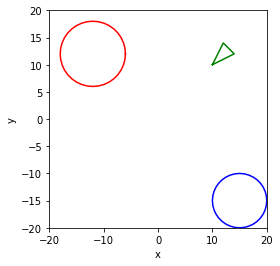

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot red circle
x = np.zeros(37)
y = np.zeros(37)
for i in range(37):
    x[i] = 6 * np.cos(np.pi / 18 * i) - 12
    y[i] = 6 * np.sin(np.pi / 18 * i) + 12

ax.plot(x, y, 'r')

# Plot blue circle
x = np.zeros(37)
y = np.zeros(37)
for i in range(37):
    x[i] = 5 * np.cos(np.pi / 18 * i) + 15
    y[i] = 5 * np.sin(np.pi / 18 * i) - 15

ax.plot(x, y, 'b')

# Plot green triangle
x = np.array([ 10, 14, 12, 10 ])
y = np.array([ 10, 12, 14, 10 ])

ax.plot(x, y, 'g')

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

(b) Write a program that plots a set of 5 magenta squares, each of side length 2 units on a set of axes where $x\in [0, 40]$. The bottom left corner of the first square should be positioned at the origin. The other 4 squares should be positioned **above and to the right** of the first square with a **horizontal gap of 1 unit** and a **vertical gap of 0 units** . You **must use a loop** to draw the 5 squares rather than set of repeated statements. 

Your plot should look like the following:

![](https://github.com/drjonshiach/Programming_skills/blob/master/Mock%20Exam%20Questions/q5b_python.png?raw=true)

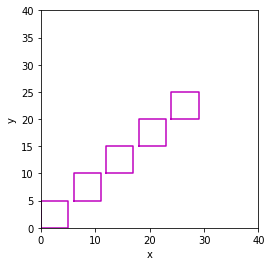

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Co-ordinates of first square
x = np.array([ 0, 5, 5, 0, 0 ])
y = np.array([ 0, 0, 5, 5, 0 ])

# Plot squares
for i in range(5):
    ax.plot(x + i * 6, y + i * 5, 'm')
    
ax.set_xlim(0, 40)
ax.set_ylim(0, 40)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

(c) Write a program to draw set of 5 circles, each with centre at $(25, 25)$ on a set of axes where $x, y \in [0, 50]$ . The circles should decrease in radius from 20 to 5 in steps of -5. The circles should appear in alternate colours, red and blue, with the largest circle drawn in red. Again you **must use a loop** to draw the 5 circles and use an if statement to draw the circles in the correct colour.

Your plot should look like the following:

![](https://github.com/drjonshiach/Programming_skills/blob/master/Mock%20Exam%20Questions/q5c_python.png?raw=true)

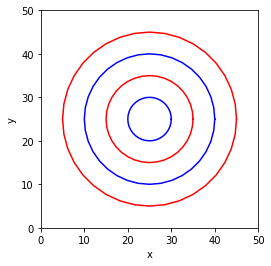

In [31]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Loop through the circles
colour = 'r' # colour of outside circle
for radius in range(20, 0, -5):
    
    # Calculate circle co-ordinates
    x = np.zeros(37)
    y = np.zeros(37)
    for i in range(37):
        x[i] = radius * np.cos(np.pi / 18 * i) + 25
        y[i] = radius * np.sin(np.pi / 18 * i) + 25
        
    # Plot circle
    ax.plot(x, y, colour)
    
    # Determine colour of next circle
    if colour == 'r':
        colour = 'b'
    else:
        colour = 'r'
    
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

---
### Question 6

(a) The following expression defines a sequence of $x$ values

$$ x_{n+1} = \frac{1}{2} \left( x_{n} + \frac{5}{x_{n}} \right).$$

For example, given a starting value of $x_0=1$

\begin{align*}
    x_0 &= 1, \\
    x_1 &= 3, \\
    x_2 &= 2.3333, \\
    x_3 &= 2.2381, \\
    & \vdots
\end{align*}

Write a program to calculate the values in this sequence using a starting value of $x_0=5$ upto $x_5$ and stores them in a one-dimensional array. Use a print command to output the array.

In [20]:
import numpy as np

X = np.zeros(6)
X[0] = 5

for n in range(5):
    X[n+1] = 1 / 2 * (X[n] + 5 / X[n])

print(X)

[5.         3.         2.33333333 2.23809524 2.2360689  2.23606798]


(b) Using a **`for` loop**, produce a table of this sequence with a column for the the values of $n$ and another column for the values of $x_n$ correct to 7 decimal places, i.e.,

```
 n     xn
--------------
 0  x.xxxxxxx
 1  x.xxxxxxx
 :      :
 5  x.xxxxxxx
```

In [21]:
print(" n     xn\n--------------")
for n in range(6):
    print("{:2d}  {:1.7f}".format(n, X[n]))

 n     xn
--------------
 0  5.0000000
 1  3.0000000
 2  2.3333333
 3  2.2380952
 4  2.2360689
 5  2.2360680


(c) Define a function called `mysequence2` that calculates the following sequence given inputs for the starting value $x_0$, the value of $b$ and the maximum value of $n$, and stores the values in a one-dimensional array.

$$ x_{n+1} = \frac{1}{2} \left( x_n + \frac{b}{x_n} \right).$$

Using your function, produce **four** tables of this sequence up to $x_4$ for $x_0=b$ and the value of $b$ changing from 7 to 13 in steps of 2. You **must use a `for` loop** to loop through the values of $b$.

In [22]:
import numpy as np


def mysequence2(x0, b, nmax):
    
    X = np.zeros(nmax + 1)
    X[0] = x0
    for n in range(nmax):
        X[n+1] = 1 / 2 * (X[n] + b / X[n])
    
    return X


# Loop through values of b
for b in range(7, 14, 2):
    
    # Calculate sequence array
    X = mysequence2(b, b, 4)
    
    # Output table
    print("\n n     xn\n--------------")
    for n in range(len(X)):
        print("{:2d} {:10.7f}".format(n, X[n]))


 n     xn
--------------
 0  7.0000000
 1  4.0000000
 2  2.8750000
 3  2.6548913
 4  2.6457670

 n     xn
--------------
 0  9.0000000
 1  5.0000000
 2  3.4000000
 3  3.0235294
 4  3.0000916

 n     xn
--------------
 0 11.0000000
 1  6.0000000
 2  3.9166667
 3  3.3625887
 4  3.3169389

 n     xn
--------------
 0 13.0000000
 1  7.0000000
 2  4.4285714
 3  3.6820276
 4  3.6063455


---
### Question 7

(a) Write a program that defines a two-dimensional array which is equivalent to the following matrix. Using a pair of nested `for` loops calculate and output the number of 1s in the matrix. 

$$X = \begin{pmatrix} 1 & 0 & 1 \cr 2 & -3 & 2 \cr 1 & 0 & -2 \end{pmatrix}$$

Your output should appear in the following form

```
number of 1s = xx
```

In [23]:
import numpy

X = np.array([[ 1, 0, 1 ], [ 2, -3, 2 ], [ 1, 0, -2 ]])
count = 0

for i in range(3):
    for j in range(3):
        if X[i,j] == 1:
            count = count + 1

print("number of 1s = {}".format(count))

number of 1s = 3


(b) Define a function called `distance` that given inputs of the co-ordinates of two points in $\mathbb{R}^2$ as two-element arrays of the form $(x_1, y_1)$ and $(x_2, y_2)$, calculates and returns the distance between the two points using the formula

$$\text{distance} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

Use your function to calculate the distance between the points $(1.3, 5.7)$ and $(7.9, -0.8)$.

In [24]:
import numpy as np


def distance(p1, p2):
    """
    Calculates the distance between two points in R2
    """
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


# Define co-ordinate arrays
point1 = np.array([ 1.3, 5.7 ])
point2 = np.array([ 7.9, -0.8 ])

# Calculate distance between the two points
dist = distance(point1, point2)
print(dist)

9.263368717696602


(c) The area of a triangle defined in $\mathbb{R}^2$ with vertices $(x_1, y_1)$, $(x_2, y_2)$ and $(x_3, y_3)$ can be calculated using the formula

$$ \text{area} = \frac{1}{2} \det \begin{pmatrix} x_1 & y_1 & 1 \cr x_2 & y_2 & 1 \cr x_3 & y_3 & 1 \end{pmatrix}.$$

Define a function called `triangle_area` that given inputs to the vertex co-ordinates calculates the area of the triangle. You may use the `det` command from MATLAB or the NumPy library in Python. Use your function to calculate the area of the triangle with vertices $(0, 1)$, $(5, 2)$ and $(2, 7)$.

In [25]:
import numpy as np


def triangle_area(v1, v2, v3):
    """ 
    Calculates the area of a triangle in R2
    """
    X = np.array([[ v1[0], v1[1], 1 ], [ v2[0], v2[1], 1 ], [ v3[0], v3[1], 1 ]])
    return 1 / 2 * np.linalg.det(X)


# Define vertex co-ordinate arrays
vert1 = np.array([0, 1])
vert2 = np.array([5, 2])
vert3 = np.array([2, 7])

# Calculate area of the triangle
area = triangle_area(vert1, vert2, vert3)
print(area)

13.999999999999998


---
### Question 8

(a) The following expression gives the probability of correctly choosing 6 lottery balls from a possible 59,

$$ \frac{1}{59} \times \frac{2}{58} \times \frac{3}{57} \times \frac{4}{56} \times \frac{5}{55} \times \frac{6}{54}.$$

Write a program which calculates and outputs this value to **10 decimal places** with suitable preceding text on the same line. The program **must use a `for` loop** to perform the calculation.

In [26]:
x = 1

for i in range(1, 7):
    x = x * i / (60 - i)

print("The probability of correctly choosing 6 lottery balls from " \
      "a possible 59 is {:1.10f}".format(x))

The probability of correctly choosing 6 lottery balls from a possible 59 is 0.0000000222


(b) The series below calculates the value of $\cos(x)$ for a given value of $x$

$$\cos(x) = \sum_{n=0}^\infty \frac{(-1)^nx^{2n}}{(2n)!} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots$$

Write a program to calculate the value of this series given the $x$ value and number of terms. You may use the `factorial` command from MATLAB or the `math` library in Python.  Use your program to calculate the value of $\cos(0.5)$ using 4 terms and print the result correct to **5 decimal places**.

In [27]:
import math

x, nterms = 0.5, 4
cosx = 0

for n in range(4):
    cosx = cosx + (-1) ** n * x ** (2 * n) / math.factorial(2 * n)

print("cos({}) = {:1.5f}".format(x, cosx))

cos(0.5) = 0.87758


(c) Define a function called `mycos` that uses the series from part (b) and a **`while` loop** to calculate the value of $\cos(x)$ ceasing iterations when the **absolute** difference between successive approximations is less than $10^{-6}$. Use your function to calculate $\cos(1)$ and output the result correct to **8 decimal places**.

In [28]:
import math


def mycos(x):
    """
    Calculates cos(x)
    """
    cosx, n, term = 0, 0, 1

    while abs(term) > 1e-6:
        term = (-1) ** n * x ** (2 * n) / math.factorial(2 * n)
        cosx = cosx + term
        n = n + 1

    return cosx
        

print("cos({}) = {:1.8f}".format(1, mycos(1)))

cos(1) = 0.54030230
